In [ ]:
from indra.sources import trips
from indra.assemblers.pysb import PysbAssembler
from mira.sources.sbml import template_model_from_sbml_string
from mira.modeling.viz import GraphicalModel
from mira.modeling import Model
from mira.modeling.askenet.petrinet import AskeNetPetriNetModel
import pysb
from pysb import pathfinder
from mira.modeling.ode import OdeModel, simulate_ode_model
import numpy
import matplotlib.pyplot as plt


In [3]:
text = 'MEK1 phosphorylates ERK2 on threonine 185 and tyrosine 187.'
tp = trips.process_text(text)
pysb.pathfinder.set_path
# Assemble a PySB model
pa = PysbAssembler(tp.statements)
pa.make_model()
sbml_str = pa.export_model('sbml')

INFO: [2023-08-14 10:06:07] indra.assemblers.pysb.assembler - Using default assembly policy.


In [148]:
tm = template_model_from_sbml_string(sbml_str)

In [151]:
model = Model(tm)

In [44]:
om = OdeModel(Model(tm),initialized=False)

In [153]:
parameters = {}
for param,model_param_object in model.parameters.items():
    parameters[param] = model_param_object.value


In [154]:
times_test = numpy.linspace(0, 250, 100)
initial_test = [10000, 10000, 0, 0, 0]
res = simulate_ode_model(ode_model = om, times=times_test,
                        parameters = parameters, initials = initial_test)



In [157]:
variable_list= list(tm.initials.keys())

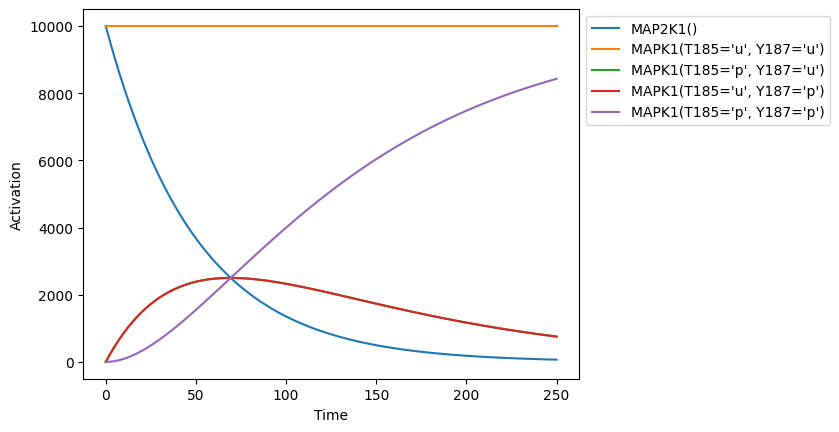

In [158]:
plt.legend(handles = plt.plot(times_test,res), labels=variable_list,loc = 'upper left', bbox_to_anchor=(1,1))
plt.xlabel('Time')
plt.ylabel('Activation')
plt.show()